# MOVIE REVIEW

In [20]:
#Text classification using machine learning Algorithms for BBC News
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_files
import sys
from time import time
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics
from sklearn.model_selection import train_test_split
import nltk

## Fetching & Training the data

In [21]:
moviedir = r'D:\proj\DATASET\movie_review'
movie_train = load_files(moviedir, shuffle=True)
#data Length
print(len(movie_train.data))
target_names=movie_train.target_names
#column names
print(target_names)
movie_vec = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize)
movie_counts = movie_vec.fit_transform(movie_train.data)
tfidf_transformer = TfidfTransformer()
tfidf_transformer = TfidfTransformer()
movie_tfidf = tfidf_transformer.fit_transform(movie_counts)
#rows and columns
print(movie_tfidf.shape)

X_train, X_test, y_train, y_test = train_test_split(
    movie_tfidf, movie_train.target, test_size = 0.20, random_state = 12)


print('data loaded')

2000
['neg', 'pos']
(2000, 25279)
data loaded


In [22]:
movie_vec

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=2,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function word_tokenize at 0x0000019D03FBCC80>,
                vocabulary=None)

##  Using the function

In [23]:
def benchmark(clf,name):
    print('_' * 80)
    print("Training: ")
	
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)
	
    t0 = time() 
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)
	
    score = metrics.accuracy_score(y_test, pred)
    kappa=metrics.cohen_kappa_score(y_test,pred)
    print("accuracy:   %0.4f" % score)
    print("\nHamming_loss=%0.4f" %metrics.hamming_loss(y_test,pred))
    print("Kappa Score:   %0.4f" %kappa)
    print("\nprecision score=%0.4f" %metrics.precision_score(y_test,pred,average='macro'))
    print("\nRecall Score=%0.4f" %metrics.recall_score(y_test,pred,average='macro'))
    print("\nF1-Score score=%0.4f" %metrics.f1_score(y_test,pred,average='macro'))
    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test, pred))
    print()
    print("classification report:")
    print(metrics.classification_report(y_test, pred,target_names=target_names))
    clf_descr = str(clf).split('(')[0]
    class_name =str(name).split('(')[0]
    return class_name, score,train_time, test_time

## Printing the Results

In [24]:
results = []
#RESULTS=[NAME_OF_ALGO ACCURACY TRAIN_TIME TEST-TIME]
for clf, name in ((RidgeClassifier(tol=1e-2, solver="sag"), "Ridge"),
                  (Perceptron(max_iter=50, tol=1e-3),"PPN"),
                  (PassiveAggressiveClassifier(max_iter=50, tol=1e-3),"PA"),
                  (KNeighborsClassifier(n_neighbors=10), "kNN"),
                   (LinearSVC(penalty="l2", dual=False,tol=1e-3),"SVM"),
                   (tree.DecisionTreeClassifier(),"DT"),
                   (MultinomialNB(alpha=.01),"M_NB"),
                   (BernoulliNB(alpha=.01),"B_NB"),
                  (RandomForestClassifier(n_estimators=100), "RF"),
                  (SGDClassifier(alpha=.0001, max_iter=50,penalty="l1"),"SGd"),
                  (NearestCentroid(),"NC"),
                  ##(MLPClassifier(),"MLP")
                 ):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf,name))
#print("ReSuLtS LIST IS",results,end="\n",sep='\n')

indices = np.arange(len(results))
results = [[x[i] for x in results] for i in range(4)]
name1, score,training_time, test_time= results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)


Ridge
________________________________________________________________________________
Training: 
train time: 0.173s
test time:  0.000s
accuracy:   0.8175

Hamming_loss=0.1825
Kappa Score:   0.6359

precision score=0.8211

Recall Score=0.8191

F1-Score score=0.8174
confusion matrix:
[[158  48]
 [ 25 169]]

classification report:
              precision    recall  f1-score   support

         neg       0.86      0.77      0.81       206
         pos       0.78      0.87      0.82       194

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400

PPN
________________________________________________________________________________
Training: 
train time: 0.024s
test time:  0.000s
accuracy:   0.8025

Hamming_loss=0.1975
Kappa Score:   0.6065

precision score=0.8092

Recall Score=0.8046

F1-Score score=0.8021
confusion matrix:
[[151  55]
 [ 24 170]]

classification report:
             

## PREDICTING THE MAXIMUM ACURACY AND NAME OF THE ALGORITHM

In [25]:
from copy import*
def scope(word, list, indexes = None):
    result = []
    if not indexes:
        indexes = []
    for index, item in enumerate(list):
        try:
            current_index = indexes + [index]
            result.append(current_index + [item.index(word)])
        except ValueError:
            pass

        if type(item[0]) == type([]):
            indexes.append(index)
            result.extend(scope(word, item, copy(indexes)))

    return result
listObject12=[]
word = max(score)
result = scope(word,results)
algo=result[0]
i=algo[0]
j=algo[1]
k=i-1
print('Maximmum accuracy is by:  ',results[k][j])
print("Maximmum accuracy is :   %0.4f" %max(score))
dataset_name="MOVIE REVIEW GRP"
best_value="BEST_CLF_FROM"
algorithm=results[k][j]
accuracy=max(score)
listObject12.extend((best_value,dataset_name,algorithm,accuracy))
listObject12

Maximmum accuracy is by:   SVM
Maximmum accuracy is :   0.8375


['BEST_CLF_FROM', 'MOVIE REVIEW GRP', 'SVM', 0.8375]

In [26]:
from IPython.display import HTML, display
import tabulate
display(HTML(tabulate.tabulate(results, tablefmt='html')))

Ridge,PPN,PA,kNN,SVM,DT,M_NB,B_NB,RF,SGd,NC
0.8175,0.8025,0.83,0.6075,0.8375,0.6475,0.79,0.7975,0.8125,0.81,0.685
0.17272496223449707,0.024000883102416992,0.03568887710571289,0.015625953674316406,0.24241852760314941,1.7716541290283203,0.015627622604370117,0.015625476837158203,2.333925247192383,0.4041910171508789,0.024000167846679688
0.0,0.0,0.0,0.2182788848876953,0.0,0.0,0.0,0.015622138977050781,0.119964599609375,0.003995180130004883,0.003992557525634766


In [27]:
display(HTML(tabulate.tabulate([listObject12], tablefmt='html')))

BEST_CLF_FROM,MOVIE REVIEW GRP,SVM,0.8375


In [28]:
G_np = np.array(results)
G_np.shape

(4, 11)

In [29]:
g1=G_np.transpose()
df=pd.DataFrame(g1,columns=['NAME_OF_ALGO', 'ACCURACY', 'TRAIN_TIME' ,'TEST_TIME',])
df

,NAME_OF_ALGO,ACCURACY,TRAIN_TIME,TEST_TIME
0,Ridge,0.8175,0.17272496223449707,0.0
1,PPN,0.8025,0.024000883102416992,0.0
2,PA,0.83,0.03568887710571289,0.0
3,kNN,0.6075,0.015625953674316406,0.2182788848876953
4,SVM,0.8375,0.24241852760314941,0.0
5,DT,0.6475,1.7716541290283203,0.0
6,M_NB,0.79,0.015627622604370117,0.0
7,B_NB,0.7975,0.015625476837158203,0.015622138977050781
8,RF,0.8125,2.333925247192383,0.119964599609375
9,SGd,0.81,0.4041910171508789,0.003995180130004883


In [30]:
df1=pd.DataFrame(G_np)

In [31]:
pd.DataFrame(listObject12,columns=['final'])

,final
0,BEST_CLF_FROM
1,MOVIE REVIEW GRP
2,SVM
3,0.8375


In [32]:
df1['Best Values']=listObject12
df1[0]=['name','acuracy','train',"test"]
df1

,0,1,2,3,4,5,6,7,8,9,10,Best Values
0,name,PPN,PA,kNN,SVM,DT,M_NB,B_NB,RF,SGd,NC,BEST_CLF_FROM
1,acuracy,0.8025,0.83,0.6075,0.8375,0.6475,0.79,0.7975,0.8125,0.81,0.685,MOVIE REVIEW GRP
2,train,0.024000883102416992,0.03568887710571289,0.015625953674316406,0.24241852760314941,1.7716541290283203,0.015627622604370117,0.015625476837158203,2.333925247192383,0.4041910171508789,0.024000167846679688,SVM
3,test,0.0,0.0,0.2182788848876953,0.0,0.0,0.0,0.015622138977050781,0.119964599609375,0.003995180130004883,0.003992557525634766,0.8375


In [33]:
final_list=df1.values.tolist()
final_list=np.array(final_list)
display(HTML(tabulate.tabulate(final_list, tablefmt='html')))

name,PPN,PA,kNN,SVM,DT,M_NB,B_NB,RF,SGd,NC,BEST_CLF_FROM
acuracy,0.8025,0.83,0.6075,0.8375,0.6475,0.79,0.7975,0.8125,0.81,0.685,MOVIE REVIEW GRP
train,0.024000883102416992,0.03568887710571289,0.015625953674316406,0.24241852760314941,1.7716541290283203,0.015627622604370117,0.015625476837158203,2.333925247192383,0.4041910171508789,0.024000167846679688,SVM
test,0.0,0.0,0.2182788848876953,0.0,0.0,0.0,0.015622138977050781,0.119964599609375,0.003995180130004883,0.003992557525634766,0.8375


## Plotting the Graph

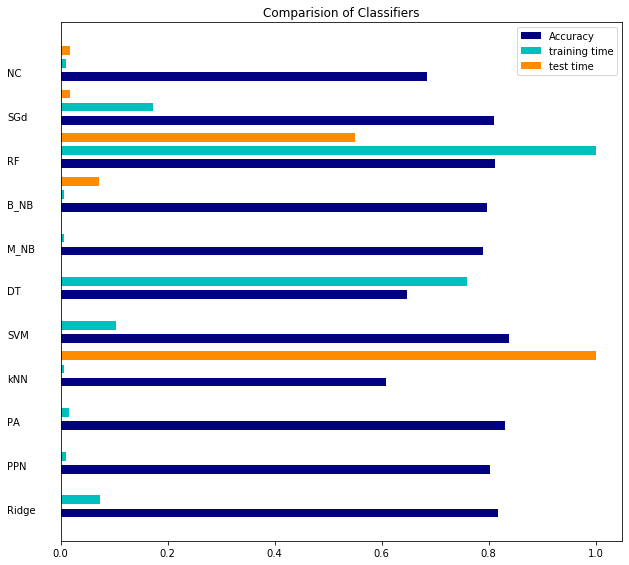

In [34]:
plt.figure(figsize=(12, 8))
plt.title("Comparision of Classifiers")
plt.barh(indices, score, .2, label="Accuracy", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, name1):
    plt.text(-.1, i, c)

plt.show()